<a href="https://colab.research.google.com/github/tayo2910/PROJECTS/blob/main/NETFLIX_Movies_Recommendation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

#**TASK: Netflix Movies Recommender System**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer      #count vectorizer was imported to convert the texts to a vector of token counts.
from sklearn.metrics.pairwise import cosine_similarity  

In [ ]:
# Reading the data
movie = pd.read_csv('/n-movies.csv')
movie

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,-2022,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [ ]:
movie.year.unique()

array(['(2018– )', '(2016– )', '(2015–2022)', '-2022', '(2022– )',
       '(2013– )', '(2008–2013)', '(II) (2022)', '(2010–2022)',
       '(2013–2022)', '(2021– )', '-2001', '(2005– )', '(2005–2020)',
       '(2011– )', '(2003– )', '(1994–2004)', '(2011–2021)',
       '(2009–2020)', '(2017–2022)', '(2011–2019)', '(2013–2020)',
       '(2019– )', '(1989–1998)', '(2016–2021)', '(2019–2023)',
       '(2013–2021)', '(2000–2007)', '(2014– )', '(2015– )',
       '(2020–2023)', '(2013–2023)', '(2020–2022)', '(2017–2020)',
       '-2003', '(2009–2017)', '(1999– )', '(2016–2022)', '(2005–2014)',
       '(2009–2015)', '(2015–2018)', '(2010– )', '(2015–2020)', '-2021',
       '-2002', '-2000', '-2012', '(2017– )', '(2008–2014)',
       '(2007–2015)', '(2014–2023)', '(2009– )', '(2015–2019)',
       '(1998–2006)', '-2020', '-1997', '(2020– )', '(2010–2017)',
       '(2006–2013)', '(2011–2018)', '-2019', '(2010–2015)',
       '(2001–2017)', '(1987–1994)', '(2014–2020)', '(2017–2021)',
       '(2013

In [ ]:
movie.duplicated().sum()

0

In [ ]:
movie.isna().sum()

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [ ]:
b = movie.groupby('title')[['rating', 'votes']].count()
b

,rating,votes
title,,
#ABtalks,1,1
#Alive,1,1
#AnneFrank - Parallel Stories,1,1
#BlackAF,1,1
#FriendButMarried 2,1,1
...,...,...
É O Amor: Familia Camargo,1,1
Òlòtūré,1,1
Ófærð,2,2


In [ ]:
movie.genre.unique()

array(['Action, Comedy, Drama', 'Biography, Drama, History',
       'Crime, Drama', 'Drama, Horror, Mystery',
       'Animation, Action, Adventure', 'Drama, Fantasy, Horror',
       'Animation, Adventure, Comedy', 'Crime, Drama, Thriller',
       'Action, Adventure, Drama', 'Biography, Drama, Mystery',
       'Action, Crime, Drama', 'Drama, Horror, Thriller',
       'Crime, Drama, Mystery', 'Comedy', 'Thriller',
       'Drama, Romance, Sport', 'Drama, History, Horror',
       'Drama, Romance', 'Drama, Horror, Sci-Fi',
       'Action, Biography, Crime', 'Comedy, Romance', 'Comedy, Drama',
       'Comedy, Drama, Romance', 'Drama, Mystery, Thriller',
       'Action, Thriller', 'Crime, Drama, Fantasy',
       'Action, Adventure, Comedy', 'Action, Drama, History', 'Drama',
       'Drama, Mystery, Sci-Fi', 'Comedy, Crime',
       'Action, Drama, Mystery', 'Drama, Fantasy, Romance',
       'Action, Comedy, Fantasy', 'Animation, Drama, Family',
       'Animation, Comedy', 'Action, Drama, Fanta

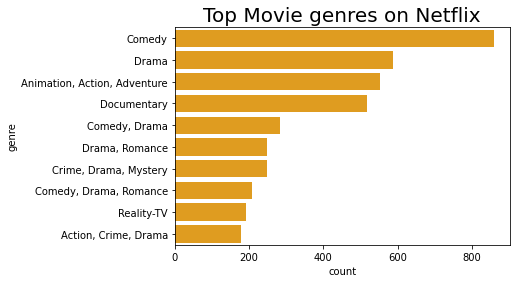

In [ ]:
#visualizing the top 10 genres of the Netflix movie dataset.
import matplotlib.pyplot as plt
Top_movie_genres = movie[movie['certificate'] == 'TV-MA']
sns.countplot(y = 'genre', color= 'orange', data = movie, order = movie.genre.value_counts().head(10).index)
plt.title("Top Movie genres on Netflix", fontsize = 20);

## We can see from the graph above that Comedy tops the list on Netflix.

## Feature_Combination

In [ ]:
# combining relevant features with no missing values into a combined feature
def combined_features(row):
  return row['title']+" "+row['description'] +" "+row['stars']
movie["combined_features"] = movie.apply(combined_features, axis =1)
movie['combined_features']

0       Cobra Kai Decades after their 1984 All Valley ...
1       The Crown Follows the political rivalries and ...
2       Better Call Saul The trials and tribulations o...
3       Devil in Ohio When a psychiatrist shelters a m...
4       Cyberpunk: Edgerunners A Street Kid trying to ...
                              ...                        
9952    The Imperfects After an experimental gene ther...
9953    The Walking Dead Sheriff Deputy Rick Grimes wa...
9954    The Crown Follows the political rivalries and ...
9955    Supernatural Two brothers follow their father'...
9956    Devil in Ohio When a psychiatrist shelters a m...
Name: combined_features, Length: 9957, dtype: object

## Feature_Extraction¶

####We will use CountVectorizer’s fit.tranform to count the number of texts, then print the transformed count_matrix into an array

In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(movie["combined_features"])
print("Count Matrix:", count_matrix.toarray())

Count Matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


####We will use the sklearn cosine_similarity to find the cos θ for the two vectors in the count matrix.¶


In [ ]:

cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.04682929, 0.06154575, ..., 0.04682929, 0.05976143,
        0.        ],
       [0.04682929, 1.        , 0.25362864, ..., 1.        , 0.22388683,
        0.1103777 ],
       [0.06154575, 0.25362864, 1.        , ..., 0.25362864, 0.11769798,
        0.05802589],
       ...,
       [0.04682929, 1.        , 0.25362864, ..., 1.        , 0.22388683,
        0.1103777 ],
       [0.05976143, 0.22388683, 0.11769798, ..., 0.22388683, 1.        ,
        0.05634362],
       [0.        , 0.1103777 , 0.05802589, ..., 0.1103777 , 0.05634362,
        1.        ]])

### Taking as input, an African movie that the user likes, and storing into a variable


In [ ]:
#Importing natural language tools...
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### There is no Index so i will make my own.

In [ ]:
movie.insert(1, "index", list(range(1, 9958)), True) 
movie

,title,index,year,certificate,duration,genre,rating,description,stars,votes,combined_features
0,Cobra Kai,1,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",Cobra Kai Decades after their 1984 All Valley ...
1,The Crown,2,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",The Crown Follows the political rivalries and ...
2,Better Call Saul,3,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",Better Call Saul The trials and tribulations o...
3,Devil in Ohio,4,-2022,TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",Devil in Ohio When a psychiatrist shelters a m...
4,Cyberpunk: Edgerunners,5,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",Cyberpunk: Edgerunners A Street Kid trying to ...
...,...,...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,9953,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130",The Imperfects After an experimental gene ther...
9953,The Walking Dead,9954,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067",The Walking Dead Sheriff Deputy Rick Grimes wa...
9954,The Crown,9955,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898",The Crown Follows the political rivalries and ...
9955,Supernatural,9956,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601",Supernatural Two brothers follow their father'...


In [ ]:
user_preference = "Devil in Ohio"
def get_index_from_title(title):
    return movie[movie.title == title]['index'].values[0]
movie_index = get_index_from_title(user_preference)
movie_index

4

In [ ]:
#Generating the similar movies matrix using the enumerate function
similar_movies = list(enumerate(cosine_sim[movie_index]))
similar_movies

[(0, 0.024514516892273002),
 (1, 0.16531163063339516),
 (2, 0.12070113739631691),
 (3, 0.1386750490563073),
 (4, 1.0000000000000004),
 (5, 0.18752289237539815),
 (6, 0.1287565506561512),
 (7, 0.21404317236952233),
 (8, 0.20672455764868078),
 (9, 0.08492077756084469),
 (10, 0.11720180773462385),
 (11, 0.22880215766121476),
 (12, 0.28867513459481287),
 (13, 0.07862136275414387),
 (14, 0.11322770341445959),
 (15, 0.1617875572323585),
 (16, 0.20965696734438363),
 (17, 0.1386750490563073),
 (18, 0.10963225241337866),
 (19, 0.21360230027966975),
 (20, 0.1941450686788302),
 (21, 0.10482848367219183),
 (22, 0.09376144618769908),
 (23, 0.10925355610938445),
 (24, 0.2124591463996994),
 (25, 0.09962709627734359),
 (26, 0.18025917091861166),
 (27, 0.0),
 (28, 0.05547001962252292),
 (29, 0.19925419255468718),
 (30, 0.15097027121927947),
 (31, 0.13089257860118403),
 (32, 0.07692307692307693),
 (33, 0.0703210846407743),
 (34, 0.24763027827182432),
 (35, 0.1494406444160154),
 (36, 0.12403473458920847)

In [ ]:
#Sorting the 10 most similar movies in descending order
sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1], reverse = True)[1:]
sorted_similar_movies = sorted_similar_movies[0:10]
sorted_similar_movies

[(4994, 0.3508232077228117),
 (1830, 0.34544086116173023),
 (7502, 0.3432032364918221),
 (6010, 0.3402723268358102),
 (3768, 0.33253108588058816),
 (7258, 0.33195686496194077),
 (7494, 0.32973900383619703),
 (5058, 0.3293532415087298),
 (9447, 0.3246137365805978),
 (649, 0.3202563076101742)]

The above are the index and cosine similarity values of the 10 most similar movies in order of preference.

In [ ]:
i = 0
for item in sorted_similar_movies:
    movie_title = movie[movie['index'] == item[0]]['title'].values[0]
    print(i+1,movie_title)
    i = i+1
    if i > 10:
        break

1 First Ladies
2 Single Street
3 Biônicos
4 Basketball or Nothing
5 Michael Bolton's Big, Sexy Valentine's Day Special
6 Theo Who Lived
7 Arranged Marriage
8 Hear No Evil
9 Toy Boy
10 Hunt for the Wilderpeople


### Based on the User preference of 'Devil in Ohio', these 10 movies above are the recommendations.